In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torchvision.datasets as datasets
import matplotlib.cm as cm
from multmaps_tsne import mult_maps_tsne 
from sklearn.manifold import TSNE
import load_data as load_d

In [25]:
def run_mmtsne(P):
    no_dims = 2
    no_maps = 8 
    max_iter = 500
    
    print(f"Running multiple maps t-SNE to construct {no_maps} maps of {P.shape[0]} words...")
    
    maps, weights = mult_maps_tsne(P, no_maps, no_dims, max_iter)
    return maps, weights

In [26]:
def plot_tsne_mnistemb(X,y,filename="tsne_mnist_plot.png"):
        plt.figure()

        output_dir = "output"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        colormap = cm.get_cmap('viridis', num_classes) 
        
        color_dict = {cls: colormap(i / num_classes) for i, cls in enumerate(unique_classes)} 
        
        for cls in unique_classes:
            mask = y == cls 
            plt.scatter(X[mask, 0], X[mask, 1], c=[color_dict[cls]], s=3, label=f'Class {cls}')
        plt.legend()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)        
        
        save_path = os.path.join(output_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Saved: {save_path}")
        plt.show()

In [27]:
def plot_tsne_wordemb(embedding, words, filename="tsne_wordemb_plot.png"):
    
    # Ensure output directory exists
    output_dir = "output"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of embedding
    plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.6)
    
    # Add text labels
    x_min, x_max = plt.xlim()
    width = x_max - x_min
    for i in range(len(words)):
        plt.text(embedding[i, 0] + 0.006 * width, embedding[i, 1], words[i], fontsize=8)
    
    plt.axis('off')
    plt.title("t-SNE Embedding")
    
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Saved: {save_path}")
    plt.show()

In [28]:
def plot_maps(maps, weights, words):
    print("Drawing maps...")
    output_dir = "output/"
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
    print(maps.shape)
    print(weights.shape)
    for m in range(maps.shape[2]):

        plt.figure(figsize=(8, 6))
        
        # Filter words with sufficient importance weight
        if maps.shape[2] > 1:
            indices = np.where(weights[:, m] > 0.05)[0]
        else:
            indices = np.arange(maps.shape[0])
    
        # Scatter plot
        plt.scatter(maps[indices, 0, m], maps[indices, 1, m], s=weights[indices, m] * 40, alpha=0.6)
        
        # Add text labels
        x_min, x_max = plt.xlim()
        width = x_max - x_min
        for i in indices:
            plt.text(maps[i, 0, m] + 0.006 * width, maps[i, 1, m], words[i], fontsize=8)
        
        plt.axis('off')
        plt.title(f"t-SNE Map {m+1}")
        plt.savefig(output_dir+"multiple_map_"+str(m)+'.png')
        plt.show()
        

In [29]:
filename = 'association1000.mat'  # Update with actual file path
P, words = load_d.load_word_assoc_data(filename)
# run tsne with mnist
mnist_folder="mnist_subsets"
mnist_trainset = datasets.MNIST(root=mnist_folder, train=True, download=True, transform=None)
X = mnist_trainset.data.numpy()
y = mnist_trainset.targets.numpy()
SX, Sy = load_d.create_mnist_subset(X, y, size=5000)


Loading and pre-processing the word association data...
Dataset contains: 1000 words


/tmp/ipykernel_8351/4065777112.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', num_classes)


Saved: output/tsne_mnist_plot.png


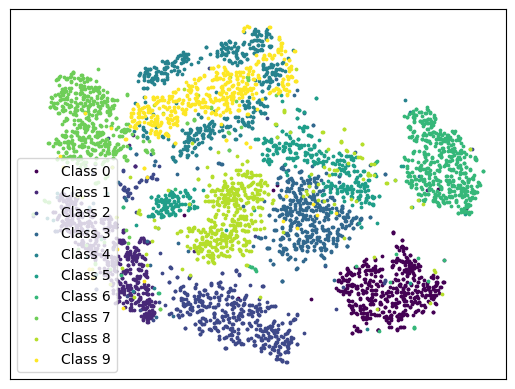

In [30]:
# tun tsne on mnist (subset)
tsne_map = TSNE(n_components=2, perplexity=30).fit_transform(SX)
plot_tsne_mnistemb(tsne_map, Sy)

Saved: output/tsne_wordemb_plot.png


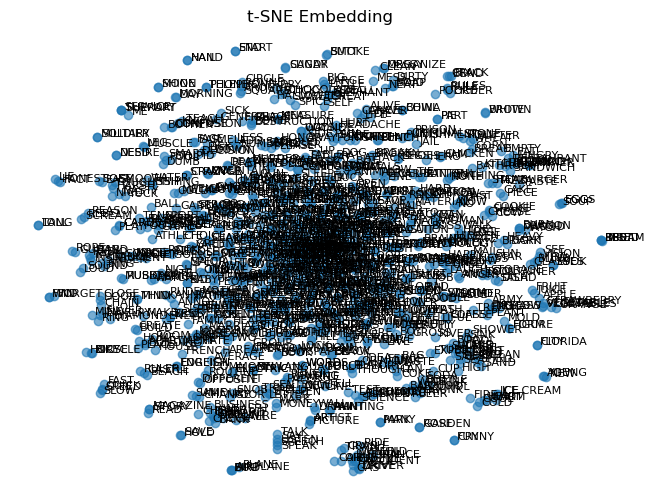

In [31]:
# run tsne with word association data
tsne_map = TSNE(n_components=2, perplexity=30).fit_transform(P)
plot_tsne_wordemb(tsne_map, words)

Running multiple maps t-SNE to construct 8 maps of 1000 words...
Iteration 25: error is 24.590142734271755
Iteration 50: error is 4.761239030130979
Iteration 75: error is 4.76100713864158
Iteration 100: error is 4.749457594812894
Iteration 125: error is 4.569906494490178
Iteration 150: error is 4.207449095798123
Iteration 175: error is 3.87125653336272
Iteration 200: error is 3.3619939102035894
Iteration 225: error is 2.8313715043776178
Iteration 250: error is 2.4606481601553716
Iteration 275: error is 2.1180140198322066
Iteration 300: error is 1.9050109576992267
Iteration 325: error is 1.7672037886935583
Iteration 350: error is 1.66925740919923
Iteration 375: error is 1.5940901728676224
Iteration 400: error is 1.5345254785218367
Iteration 425: error is 1.4855752143984877
Iteration 450: error is 1.4443787767907525
Iteration 475: error is 1.408812164879461
Iteration 500: error is 1.377656338390106
Drawing maps...
(1000, 2, 8)
(1000, 8)


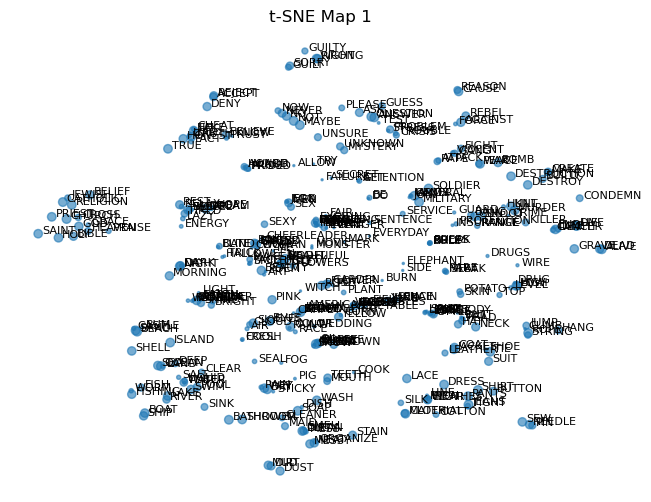

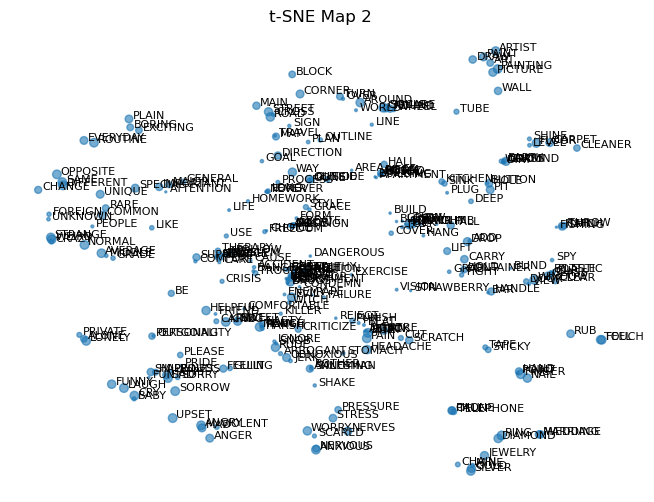

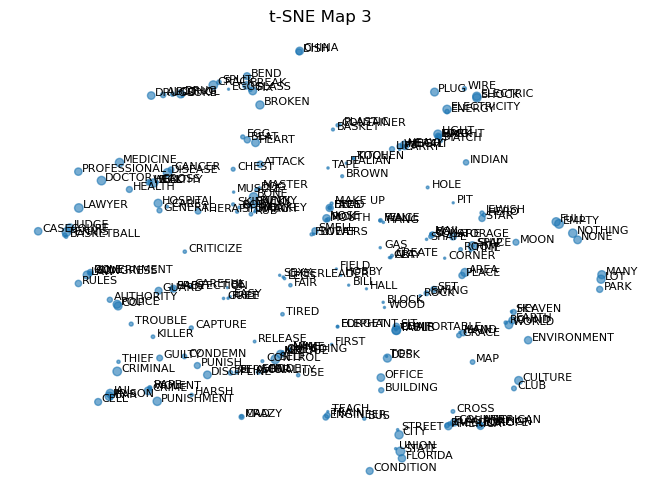

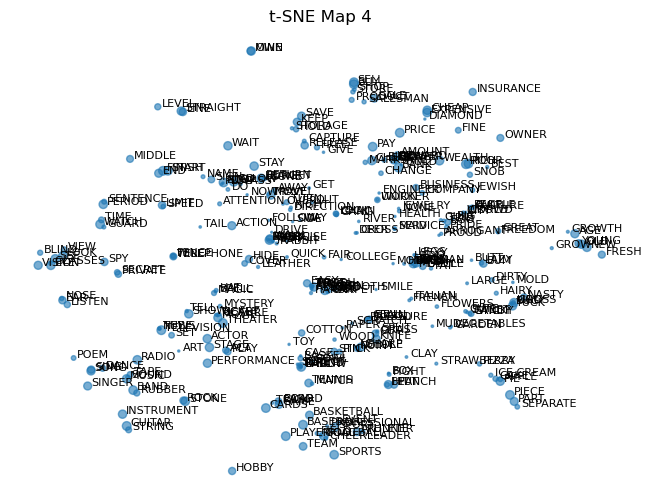

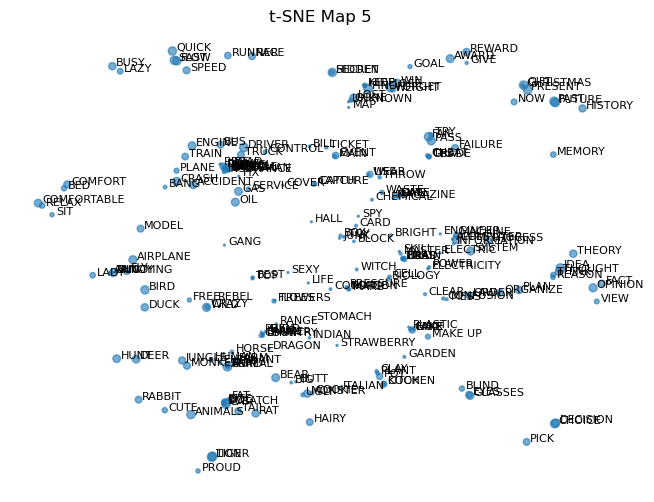

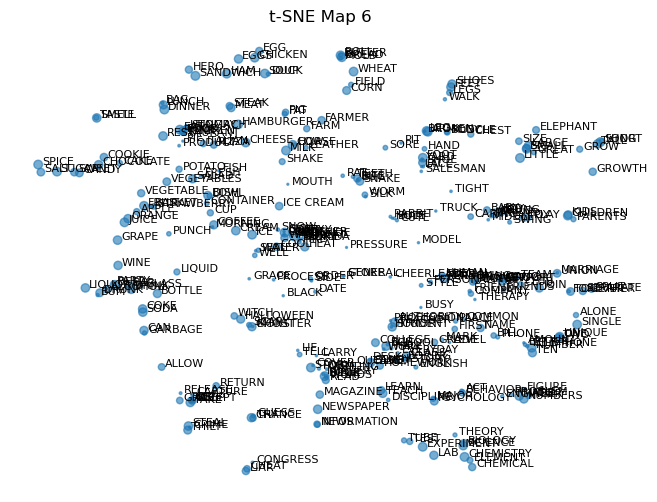

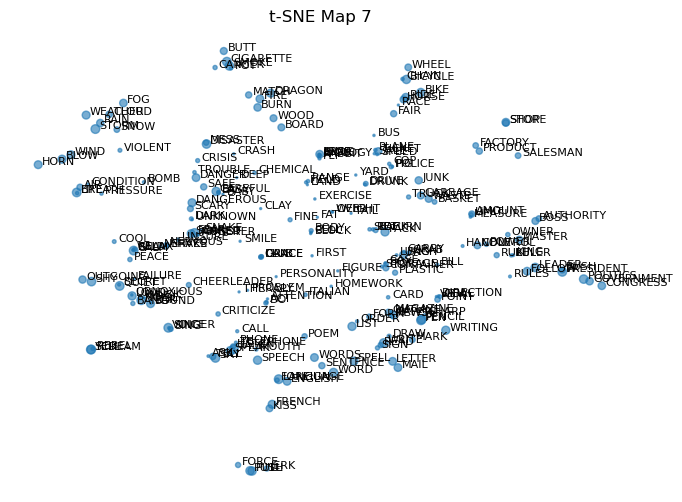

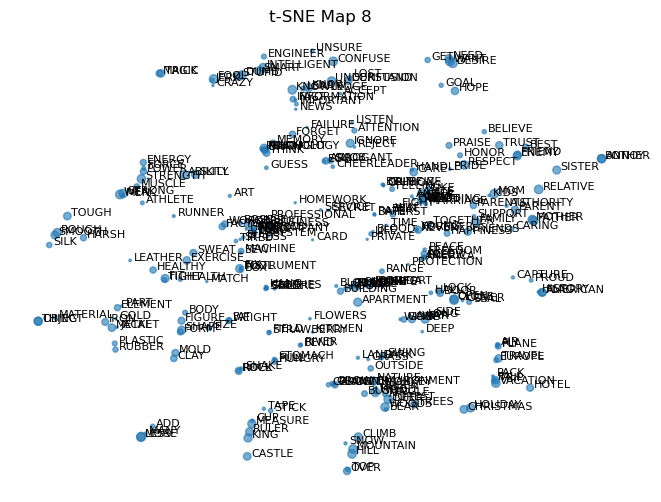

In [32]:
# run multiple maps tsne
maps, weights = run_mmtsne(P)
plot_maps(maps, weights, words)